In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import pandas as pd

### Loading the data into NumPy arrays

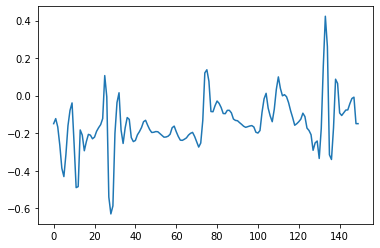

In [24]:
traindf = pd.read_csv('../data/train.csv', header = None)
valdf = pd.read_csv('../data/val.csv', header = None)
testdf = pd.read_csv('../data/test.csv', header = None)
plt.plot(traindf[0][ : 150])
def return_segments(df):
    ''' Returns 2 arrays : 
        x of shape (num_examples, num_features = 150)
        y of shape (num_examples, num_classes = 5)
        Extracts this from given Pandas DataFrame
    '''
    x = np.zeros((len(df) // 150, 450))
    y = np.zeros((len(df) // 150, 5))
    for i in range(1, len(df) // 150) : 
        # taking 150 values of 3 channels at a time, flattening and 
        x[i - 1] = df.iloc[(i - 1) * 150 : i * 150,  : 3].values.reshape(450)
        # finding single one_hot encoded label (which occurs maximum times in 150 values)
        label_array = df.iloc[((i - 1) * 150) : i * 150, 3 : ].values
        ind = np.argmax(np.sum(label_array, axis = 0))
        label = np.zeros_like(df.iloc[0, 3 : ].values)
        label = label.astype('float')
        label[ind] = 1
        y[i - 1] = label
        
    num = len(df) // 150
    # last example isn't considered in the loop
    x[num - 1] = df.iloc[(num - 1) * 150 : , : 3].values.reshape(450)
    # just taking the central value for the last label
    y[num - 1] = df.iloc[((num - 1) * 150) + 75, 3 : ].values
    return x, y

# Calling loading function and load all data into NumPy arrays
# as required by sklearn
x_test, y_test_ = return_segments(testdf)
x_train, y_train_ = return_segments(traindf)
# Converting one_hot encoded labels to integers
y_test = np.argmax(y_test_, axis = 1)
y_train = np.argmax(y_train_, axis = 1)

### Plotting FFT of data

(450,)


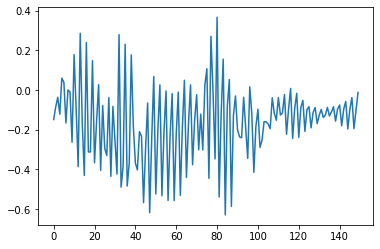

In [58]:
# Number of sample points
N = 150
# Sample Spacing (ideally it is 50 Hz and we shall consider that itself)
T = 1 / 50

x = np.linspace(0.0, N * T, N)
print(x_train[0].shape)
y = x_train[0, : 150]
plt.plot(y)

In [30]:
print(type(traindf.iloc[ : 150, : 3].values))

<class 'numpy.ndarray'>


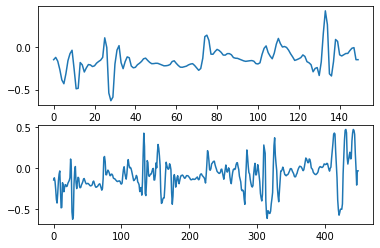

In [57]:
a = traindf.iloc[ : 150, : 3].values
plt.subplot(211)
plt.plot(a[ : , 0])
a = np.transpose(a).reshape(450)
plt.subplot(212)
plt.plot(a)